## 3 - Histograms

* Learn the distribution of intensities in an image
* Locate objects
* Segment images
* Enhance contrast
* ...

## 3 - Histograms

Let's load up our cat image from before.

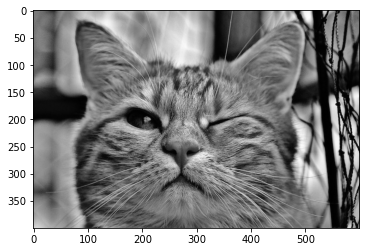

In [40]:
cat_gray = cv2.imread('img/cat.jpg', cv2.IMREAD_GRAYSCALE)

import matplotlib.cm as cm
imshow(cat_gray, cmap = cm.gray)

Computing image histograms in OpenCV

In [41]:
hist_edges = cv2.calcHist([cat], [0], None, [256], [0, 256])

Computing image histograms in NumPy

In [42]:
hist_edges, bins = np.histogram(cat.ravel(), 256, [0, 256])

## Important differences

* The `cv2` is faster `numpy`.
* The `np.hist` **257** elements 
    * each bin computed as 0-0.99, 1-1.99, etc.
* OpenCV has only **256**. 
    * This is important for plotting.
* NumPy has another method, `bincount`, which is faster than `histogram`.

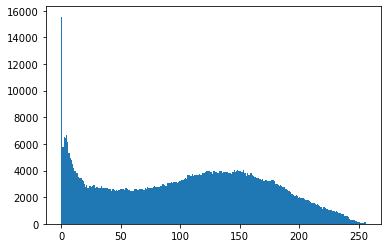

In [48]:
_ = hist(cat.ravel(), 256, [0, 256])

## 3 - Histograms

*Equalization* is an important concept in the context of image histograms.

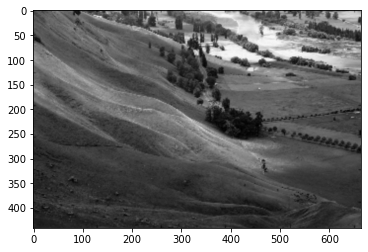

In [49]:
img = cv2.imread('img/wiki.png', cv2.IMREAD_GRAYSCALE)
imshow(img, cmap = cm.gray)

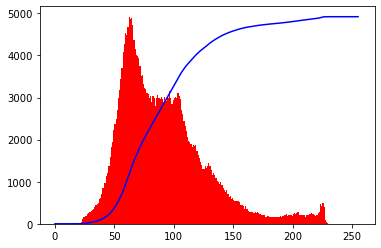

In [50]:
edges, bins = np.histogram(img.ravel(), 256, [0, 256])
cdf = edges.cumsum()
cdf_norm = cdf * edges.max() / cdf.max()

_ = plot(cdf_norm, color = 'b')
_ = hist(img.ravel(), 256, [0, 256], color = 'r')

Equalization smooths out the CDF of the image histogram, making it as close to a straight line as possible. This has the effect of improving the image contrast.

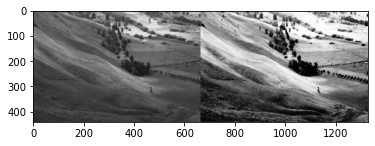

In [51]:
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))
imshow(res, cmap = cm.gray)

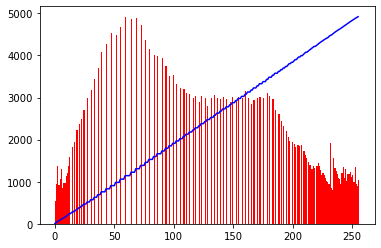

In [53]:
edges, bins = np.histogram(equ.ravel(), 256, [0, 256])
cdf = edges.cumsum()
cdf_norm = cdf * edges.max() / cdf.max()

_ = plot(cdf_norm, color = 'b')
_ = hist(equ.ravel(), 256, [0, 256], color = 'r')

**ASSIGNMENT!** Implement histogram equalization *without* the help of `equalizeHist`. (Hint: create a lookup table for the CDF, mapping the original bins to the equalized ones, so you can do something similar to `equalized_image = cdf[original_image]`)